## Audio Preprocessing 

This notebook attempts to get the MFCC plots of input of machine sound audio files,
then extract square pieces of the plot as final input for a neural net.

Data is From Zenodo, MIMII machine dataset. Main audio used during development was the 0dB pump sound set.

Mainly based on Tutorial at: https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

Also based off of the Librosa Specshow Docs: https://librosa.org/doc/main/auto_examples/plot_display.html

In [113]:
import librosa
import librosa.display

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from IPython.display import Audio

%matplotlib inline

#### Initial Data Load and Check

In [2]:
ls audio-data/pump/id_00/abnormal/00000001.wav

audio-data/pump/id_00/abnormal/00000001.wav


In [26]:
normal_audio_path = 'audio-data/pump/id_00/normal/00000001.wav'
abnormal_audio_path = 'audio-data/pump/id_00/abnormal/00000001.wav'

y1 , sr1 = librosa.load(normal_audio_path)
y2 , sr2 = librosa.load(abnormal_audio_path)

#print(type(x), type(sr),)
print(f"\nWav file array shape is: {y.shape}\nsampling rate is: {sr}")


Wav file array shape is: (220500,)
sampling rate is: 22050


### Audio Inspection
- there seems to be a very obvious audible difference in between *normal* and *abnormal*. At least among the 0dB pump samples I listened to.
- the entire 10 seconds shouldn't be necessary to classify between normal/broken.
- default sampling rate seems good.

In [30]:
Audio(normal_audio_path, rate=sr1)

In [31]:
Audio(abnormal_audio_path, rate=sr2)

In [35]:
print(f"{normal_audio_path} clip is", librosa.get_duration(y=y1, sr=sr1), "seconds long.")
print(f"{abnormal_audio_path} clip is", librosa.get_duration(y=y2, sr=sr2), "seconds long.")

audio-data/pump/id_00/normal/00000001.wav clip is 10.0 seconds long.
audio-data/pump/id_00/abnormal/00000001.wav clip is 10.0 seconds long.


### Basic Waveforms

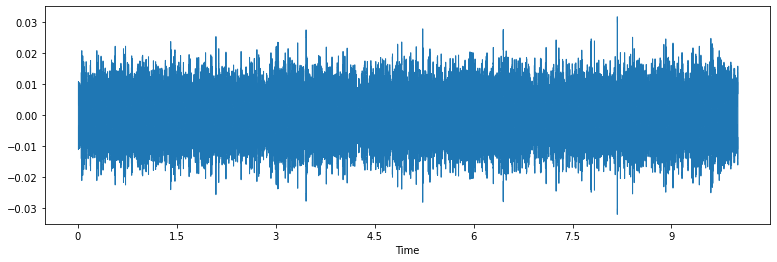

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 4))

#display waveforms?
librosa.display.waveshow(y, sr=sr)

### Spectrogram Subplots for Normal and Abnormal Machine Operation

In [96]:
chroma1 = librosa.feature.chroma_cqt(y=y1, sr=sr)
chroma2 = librosa.feature.chroma_cqt(y=y2, sr=sr)

#### STFT (log scale)

In [94]:
# STFTs of y
D1 = librosa.stft(y1) 
D2 = librosa.stft(y2)
S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)

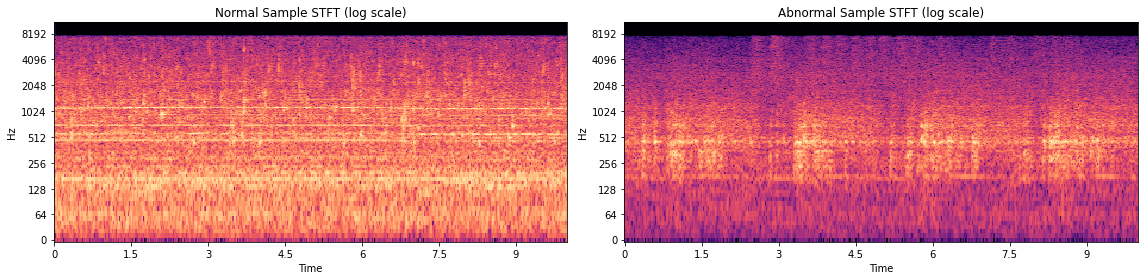

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16, 4))

img1 = librosa.display.specshow(S_db1, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Normal Sample STFT (log scale)')
img2 = librosa.display.specshow(S_db2, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set(title='Abnormal Sample STFT (log scale)')
plt.tight_layout()

#### Melspectrogram

In [95]:
M1 = librosa.feature.melspectrogram(y=y1, sr=sr)
M2 = librosa.feature.melspectrogram(y=y2, sr=sr)
M_db1 = librosa.power_to_db(M1, ref=np.max)
M_db2 = librosa.power_to_db(M2, ref=np.max)

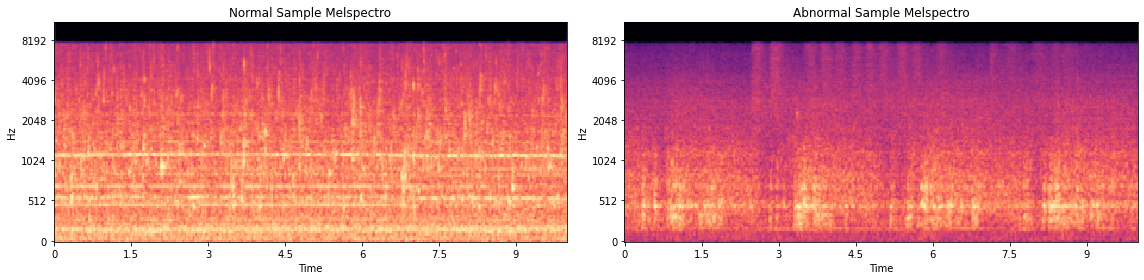

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16, 4))

img1 = librosa.display.specshow(M_db1, x_axis='time', y_axis='mel', ax=ax[0])
ax[0].set(title='Normal Sample Melspectro')
img2 = librosa.display.specshow(M_db2, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Abnormal Sample Melspectro')
plt.tight_layout()

#### Chroma Relation

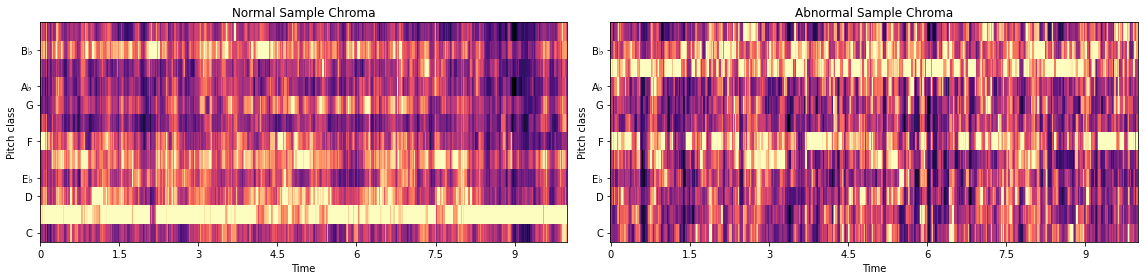

In [120]:
# chroma features
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16, 4))

img1 = librosa.display.specshow(chroma1, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[0])
ax[0].set(title='Normal Sample Chroma')
img2 = librosa.display.specshow(chroma2, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[1])
ax[1].set(title='Abnormal Sample Chroma')
plt.tight_layout()

Apparently these clips are 10 seconds long? maybe just split them?

In [5]:
Y = librosa.stft(y) # short time Ft
Ydb = librosa.amplitude_to_db(abs(Y)) # does dB scaling of the spectro

Turns out librosa has a amp to dB scaling func for the spectrogram

### Choose Spectrogram
- librosa.feature
- normal or log spectrogram? Would a frequency cap be needed for the normal ones?
- `inferno` colormap seems like the classic, except for in MFCSS

#### Normal Librosa Spectrogram 

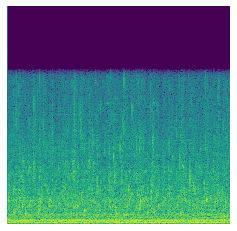

In [6]:
#display Spectrogram
plt.figure(figsize=(4, 4))
plt.axis('off')
fig = librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz',cmap='viridis') 

#### Log Spectrogram

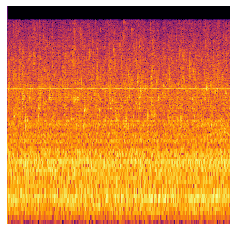

In [7]:
fig = plt.figure(figsize=(4, 4))
plt.axis('off')
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log', cmap='inferno')

#### MFCCS

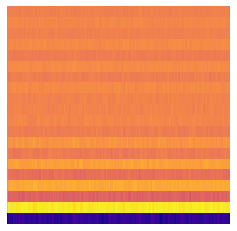

In [8]:
fig = plt.figure(figsize=(4, 4))
mfccs = librosa.feature.mfcc(y=y, sr=sr)
#print(mfccs.shape) #Displaying  the MFCCs:
plt.axis('off')
librosa.display.specshow(data=mfccs, sr=sr, x_axis='time', cmap='plasma')

#### Save Spectrograms Func
- convert images from one pump to spectro

In [24]:
# load wav
audio_path = 'audio-data/pump/id_00/normal/00000000.wav'
y , sr = librosa.load(audio_path)

In [82]:
# create the the actual spectro figure
fig = plt.figure(figsize=(4, 4))
plt.axis('off')
mfccs = librosa.feature.mfcc(y=y, sr=sr)
librosa.display.specshow(data=mfccs, sr=sr, x_axis='time', cmap='plasma')

# save
fig.savefig('image-data/spec1.png')
plt.close()

In [52]:
# count the files in both folders
# 4211 cli
time_est = (104 / 1000) * 4211 / 60
n = 2
print('Compute time estimate is {time_est:.{digits}f} minutes.'.format(time_est=time_est, digits=n))

Compute time estimate is 7.30 minutes.


#### Full Spectrogram Plot and Save Script

In [55]:
import sys
import os

In [89]:
# get file names
abnormal0_folder = "audio-data/pump/id_00/abnormal"

In [90]:
# get file count
_, _, files = next(os.walk(abnormal0_folder))
file_count = len(files)

Trying to test wav_file names

In [1]:
# for wav_file in files:
#     print(wav_file)

Selecting the pump ID from the input directory

In [12]:
import re

In [13]:
!ls audio-data/pump/id_00/abnormal/00000002.wav

audio-data/pump/id_00/abnormal/00000002.wav


In [38]:
test_str = "audio-data/pump/id_02/abnormal/00000002.wav"

regex_pattern = r'id_\d{2}'
pump_id = re.search(regex_pattern, test_str).group(0)

print(pump_id)

id_02
